# Колебания маятника с затуханием

В данном ноутбуке рассматриваются свободные колебания маятника (при отсутствии внешних сил) при наличии трения. Используются библиотеки NumPy, SciPy, Matplotlib.</f
* **Уравнение движения имеет вид:** 
\begin{align*}
    \ddot{\theta}+\omega_0^2 sin(\theta)+2\delta\dot{\theta}=0,
\end{align*}

где $\theta$ - угол отклонения маятника от вертикали, $\omega_0^2=\frac{g}{l}$ - собственная (циклическая) частота, $\delta$ - коэффициент затухания

**Документация** [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

**Обозначение:** $\dot{\theta}=\frac{d\theta}{dt}$, $\ddot{\theta}=\frac{d^2\theta}{dt^2}$

* **Уравнение гармонического осциллятора**

Пусть имеем уравнение движения без трения:
\begin{align*}
    \ddot{x}+\omega_0^2 sin(x)=0,
\end{align*}

В случае малых колебаний, когда можем положить $sin(x)\approx x$ получим уравнение гармонического осциллятора:

\begin{align*}
    \ddot{x}+\omega_0^2 x=0
\end{align*}
## Список литературы:
   1. В. В. Мигулин, "Основы теории колебаний"
   2. Методичка [раз](https://mipt.ru/education/chair/physics/S_I/method/Meh_col.pdf)

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # Для изменения размера шрифта на графиках

In [2]:
# Длина маятника
l = 2
# Ускорение свободного падения
g = 9.8
# Коэффициент затухания
delta = 0.3
# Собственная частота
omega_0 = np.sqrt(g/l)
# Начальное угол и угловая скорость
theta_0 = np.pi/4
ang_vel_0 = 7

### Изобразим начальное положение маятника

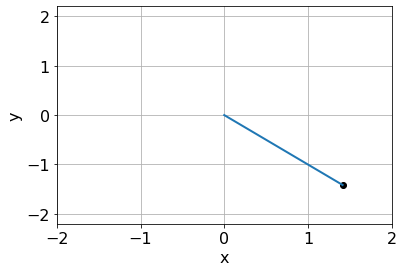

In [3]:
plt.plot([0, l*np.sin(theta_0)], [0, -l*np.cos(theta_0)], lw=2)
plt.scatter(l*np.sin(theta_0), -l*np.cos(theta_0), color='k')

plt.xlim([-2, 2])
plt.ylim([-2.2, 2.2])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [4]:
# Инициализируем функцию для последующего решения в odeint
def f(y, t, omega_0, delta):
    theta, ang_vel = y
    dydt = [ang_vel,
           -omega_0**2 * np.sin(theta)-2*delta*ang_vel]
    return dydt

# Время моделирования и начальные условия
t = np.arange(0, 20, 0.01)
y0 = [theta_0, ang_vel_0]

# В solution хранятся вектора ответов
solution = odeint(f, y0, t, args=(omega_0, delta)).T

In [5]:
solution.shape

(2, 2000)

In [6]:
[theta, ang_vel] = solution[0, :], solution[1, :]

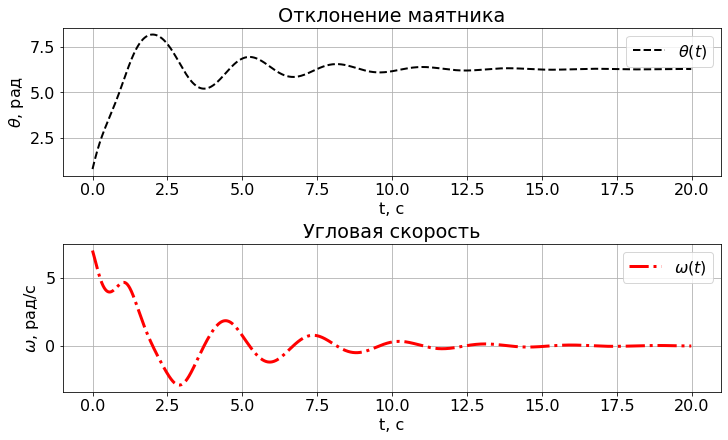

In [7]:
fig, ax = plt.subplots(2, figsize=(10, 6), constrained_layout=True)
ax[0].plot(t, theta, 'k--', lw=2, label='$\\theta(t)$')
ax[1].plot(t, ang_vel, 'r-.', lw=3, label='$\\omega(t)$')

ax[0].set_xlabel('t, с')
ax[0].set_ylabel('$\\theta$, рад')
ax[0].set_title('Отклонение маятника')
ax[0].grid(True)

ax[1].set_xlabel('t, с')
ax[1].set_ylabel('$\\omega$, рад/с')
ax[1].set_title('Угловая скорость')
ax[1].grid(True)

ax[0].legend()
ax[1].legend()

### Изобразим положение маятника в последний момент времени

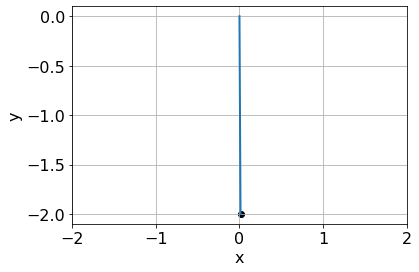

In [8]:
plt.plot([0, l*np.sin(theta[-1])], [0, -l*np.cos(theta[-1])], lw=2)
plt.scatter(l*np.sin(theta[-1]), -l*np.cos(theta[-1]), color='k')

plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

### Построим фазовый портрет системы

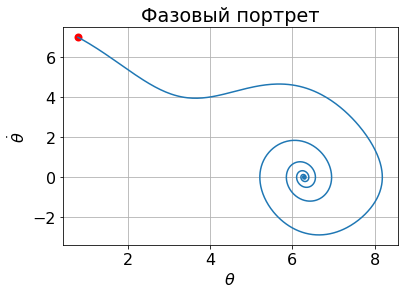

In [9]:
plt.plot(theta, ang_vel)
plt.xlabel('$\\theta$')
plt.ylabel('$\dot{\\theta}$')
plt.title('Фазовый портрет')
plt.grid()
# Начальная состояние системы
plt.scatter(theta[0], ang_vel[0], color='r', lw=2)

## Анимация маятника

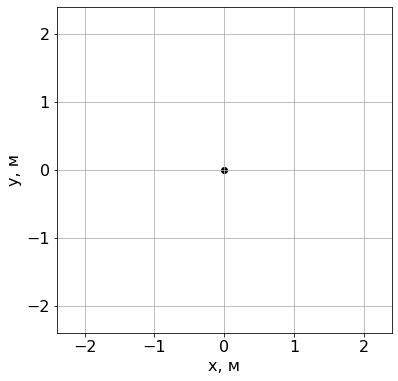

In [10]:
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_xlim([-1.2*l, 1.2*l])            
ax1.set_ylim([-1.2*l, 1.2*l])
ax1.set_xlabel('x, м')
ax1.set_ylabel('y, м')
ax1.grid()
# Создадим объекты, которые будут меняться на каждой итерации
line1, = ax1.plot([], [], color='k') # нить/стержень
line2 = ax1.scatter([], [], color='grey', lw=6) # материальная точка
line3 = ax1.scatter([0], [0], color='k', lw=1) # точка подвеса

In [11]:
num_frames = 100
# Преобразуем массивы для анимации (не нужно строить каждый отсчет)
theta_anim = theta[::int((len(theta)/num_frames)//1)]

In [12]:
# Данная функция рисует кадр. n - номер кадра
def drawframe(n):
    line1.set_data([0, l*np.sin(theta_anim[n])], [0, -l*np.cos(theta_anim[n])])
    line2.set_offsets([l*np.sin(theta_anim[n]), -l*np.cos(theta_anim[n])])
    return (line1, line2)

In [13]:
from matplotlib import animation
# blit=True перерисовывает только те части, которые были изменены
anim = animation.FuncAnimation(fig1, drawframe, frames=num_frames, interval=30, blit=True)

In [14]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [15]:
anim

## Анимация маятника и фазового портрета

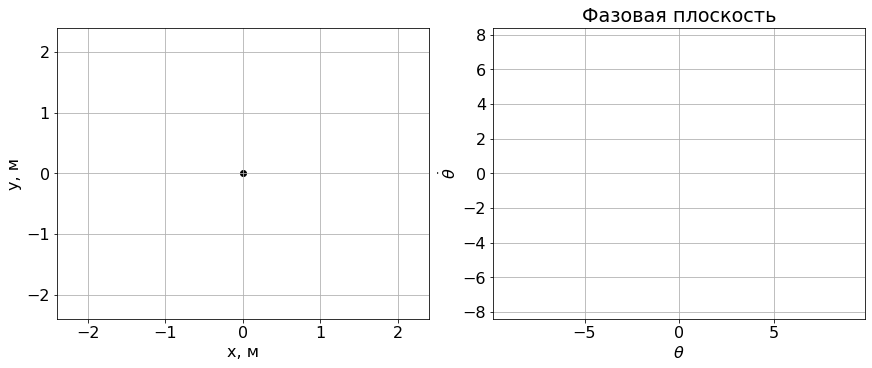

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)
ax[0].set_xlim([-1.2*l, 1.2*l])            
ax[0].set_ylim([-1.2*l, 1.2*l])
ax[0].set_xlabel('x, м')
ax[0].set_ylabel('y, м')
ax[0].grid()

ax[1].set_xlim([-1.2*max(abs(theta)), 1.2*max(abs(theta))])            
ax[1].set_ylim([-1.2*max(abs(ang_vel)), 1.2*max(abs(ang_vel))])
ax[1].set_xlabel('$\\theta$')
ax[1].set_ylabel('$\dot{\\theta}$')
ax[1].set_title('Фазовая плоскость')
ax[1].grid()
# Создадим объекты, которые будут меняться на каждой итерации
line1, = ax[0].plot([], [], color='k') # нить/стержень
scat1 = ax[0].scatter([], [], color='grey', lw=5) # материальная точка
scat2 = ax[0].scatter([0], [0], color='k', lw=1) # точка подвеса

trajectory, = ax[1].plot([], [], color='k') # Траектория на фазовой плоскости
scat3 = ax[1].scatter([], [], color='b', lw=1) # точка на фазовой плоскости

In [17]:
num_frames = 200
# Преобразуем массивы для анимации (не нужно строить каждый отсчет)
theta_anim = theta[::int((len(theta)/num_frames)//1)]
ang_vel_anim = ang_vel[::int((len(ang_vel)/num_frames)//1)]

In [18]:
# Данная функция рисует кадр. n - номер кадра
def drawframe(n):
    line1.set_data([0, l*np.sin(theta_anim[n])], [0, -l*np.cos(theta_anim[n])])
    scat1.set_offsets([l*np.sin(theta_anim[n]), -l*np.cos(theta_anim[n])])
    trajectory.set_data(theta_anim[:(n+1)], ang_vel_anim[:(n+1)])
    scat3.set_offsets([theta_anim[n], ang_vel_anim[n]])
    return (line1, scat1, trajectory)

In [19]:
from matplotlib import animation
# blit=True перерисовывает только те части, которые были изменены
anim = animation.FuncAnimation(fig, drawframe, frames=num_frames, interval=40, blit=True)

In [20]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [ ]:
anim